
# Project: Investigate a Dataset (TMDb movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this activity, I am going to explore factors that impact on the net profit of movies to help invsitors to garantee the intrest. The data set, which is going to be explored, contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The Question we are going to answer it is `What are factors have significant impact on the movies profits?`



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


<ul>
<li><a href="#checking-up">Checking up</a></li>
<li><a href="#cleaning">Correcting & Cleaning </a></li>
</ul>

<a id='checking-up'></a>
### Checking Up
Loading data set and then checking up null value, duplicate records, and types of attributes.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking up null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
# checking up types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# checking up duplication records
df.duplicated().sum()

1

In [6]:
# checking up columns values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



<a id='cleaning'></a>
### Correcting & Cleaning
The data set needs to correct types of attributes, drop duplication records/unwanted columns and then create 4 data frams `df_movies`, `df_directors`, `df_casts` & `df_genres`.

In [7]:
# correction types of attributes
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['popularity'] = df['popularity'].astype(float)
df['vote_count'] = df['vote_count'].astype(int)
df['vote_average'] = df['vote_average'].astype(float)


In [8]:
# checking up date value
df.release_date.describe()

count                   10866
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1969-01-01 00:00:00
last      2068-12-22 00:00:00
Name: release_date, dtype: object

In [9]:
# correctiong release date in future
df['year'] = df['release_year']
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day

df['release_date'] = pd.to_datetime(df[['year','month','day']])
df.release_date.describe()

count                   10866
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1960-01-01 00:00:00
last      2015-12-31 00:00:00
Name: release_date, dtype: object

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop(['homepage','tagline','keywords', 'year', 'month', 'day', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [12]:
# copying into separate dataframes.
df_movies = df.copy()
df_directors = df.filter(items=['id','director']).dropna()
df_casts = df.filter(items=['id','cast']).dropna()
df_genres = df.filter(items=['id','genres']).dropna()
df_companies = df.filter(items=['id','production_companies']).dropna()

In [13]:
#droping unwanted columns of df_movies
df_movies.drop(['cast','director','genres','production_companies'], axis=1, inplace=True)
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> it is needed to create ne col for `net_profit` by subtracting `budget` from `revenue`.

In [14]:
#adding profit column
df_movies['net_profit'] = df_movies.revenue - df_movies.budget

> We need to exclude all non profitable movies, so that we be able to provide a perfect advice to investors in movies.

In [15]:
#ignoreing all movies has no budget or revenue records
df_movies = df_movies.query('budget > 0 and revenue > 0')
df_movies.shape

(3854, 13)

> `cast`, `director`, `genres` & `production_companies` are going to be cosidered the factors impact on the movies profit. while each factor "column" has a series of values separated with `|`. So, they need to be converted into rows (ONE row for each value).

In [16]:
# correcting by changing series value to rows
df_casts['cast'] = df_casts.cast.str.split(pat='|')
df_casts = df_casts.cast.apply(pd.Series)\
    .merge(df_casts, left_index = True, right_index = True)\
    .drop(["cast"], axis = 1)\
    .melt(id_vars = ['id'], value_name = "cast")\
    .drop("variable", axis = 1)\
    .dropna()\
    .drop_duplicates()

#merging cast with movies
df_casts = df_casts.merge(df_movies, left_on='id', right_on='id')
df_casts.shape

(19195, 14)

In [17]:
#correcting by changing series value to rows
df_directors['director'] = df_directors.director.str.split(pat='|')
df_directors = df_directors.director.apply(pd.Series)\
    .merge(df_directors, left_index = True, right_index = True)\
    .drop(["director"], axis = 1)\
    .melt(id_vars = ['id'], value_name = "director")\
    .drop("variable", axis = 1)\
    .dropna()\
    .drop_duplicates()

#merging directors with movies
df_directors = df_directors.merge(df_movies, left_on='id', right_on='id')
df_directors.shape

(4164, 14)

In [18]:
#correcting by changing series value to rows
df_genres['genres'] = df_genres.genres.str.split(pat='|')
df_genres = df_genres.genres.apply(pd.Series)\
    .merge(df_genres, left_index = True, right_index = True)\
    .drop(["genres"], axis = 1)\
    .melt(id_vars = ['id'], value_name = "genres")\
    .drop("variable", axis = 1)\
    .dropna()\
    .drop_duplicates()

#merging genres with movies
df_genres = df_genres.merge(df_movies, left_on='id', right_on='id')
df_genres.shape

(10303, 14)

In [19]:
#correcting by changing series value to rows
df_companies['production_companies'] = df_companies.production_companies.str.split(pat='|')
df_companies = df_companies.production_companies.apply(pd.Series)\
    .merge(df_companies, left_index = True, right_index = True)\
    .drop(["production_companies"], axis = 1)\
    .melt(id_vars = ['id'], value_name = "production_companies")\
    .drop("variable", axis = 1)\
    .dropna()\
    .drop_duplicates()

#merging production companies with movies
df_companies = df_companies.merge(df_movies, left_on='id', right_on='id')
df_companies.shape

(10583, 14)

> any factor `cast`, `director`, `genres` or `production_companies` participated in only one movie, it will be dropped because it cannot be considered as a significant factor.

In [20]:
# dropping all cast participated in only ONE movie
x = df_casts.cast.value_counts()
y = df_casts.cast.isin(x.index[x>1])
df_casts = df_casts[y]
df_casts.shape


(15077, 14)

In [21]:
# dropping all directors participated in only ONE movie
x = df_directors.director.value_counts()
y = df_directors.director.isin(x.index[x>1])
df_directors = df_directors[y]
df_directors.shape


(3166, 14)

In [22]:
# dropping all directors participated in only ONE movie
x = df_genres.genres.value_counts()
y = df_genres.genres.isin(x.index[x>1])
df_genres = df_genres[y]
df_genres.shape


(10302, 14)

In [23]:
# dropping all production companies participated in only ONE movie
x = df_companies.production_companies.value_counts()
y = df_companies.production_companies.isin(x.index[x>1])
df_companies = df_companies[y]
df_companies.shape


(8464, 14)

<a id='eda'></a>
## Exploratory Data Analysis

<ul>
<li><a href="#exploring-movies">Exploring Movies</a></li>
<li><a href="#exploring-factors">Exploring Factors</a></li>
<li><a href="#exploring-factors-top10-movies">Exploring Factors (Top10 Movies)</a></li>
</ul>

<a id='exploring-movies'></a>

### Exploring Movies
>Exploring movies in terms of (count vs years), (net profit vs years) & top 10 net profit of movies.

In [24]:
# fixing the top scale to be 10
N = 10

Text(0.5,1,'counts of movies vs years')

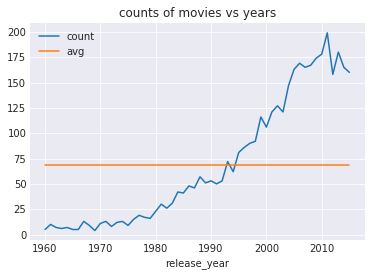

In [25]:
# counts of movies vs years

data = df_movies.groupby('release_year')[['release_year']].count()
data['net_profit'] = df_movies.groupby('release_year')[['net_profit']].mean()
data['avg'] = df_movies.groupby('release_year')['release_year'].count().mean()
data.rename(columns={'release_year':'count'}, inplace=True)
data.plot(y=['count', 'avg'])
plt.title('counts of movies vs years')

Text(0.5,1,'net profit average of movies vs years')

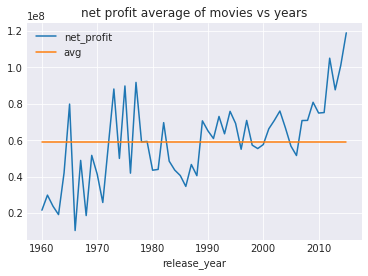

In [26]:
# net profit of movies vs years

data = df_movies.groupby('release_year')['net_profit'].mean()
data = pd.DataFrame(data.values, index=data.index, columns=['net_profit'])
data['avg'] = df_movies.groupby('release_year')['net_profit'].mean().mean()
data.plot()
plt.title('net profit average of movies vs years')

Text(0.5,1,'Top 10 of movies vs net profit')

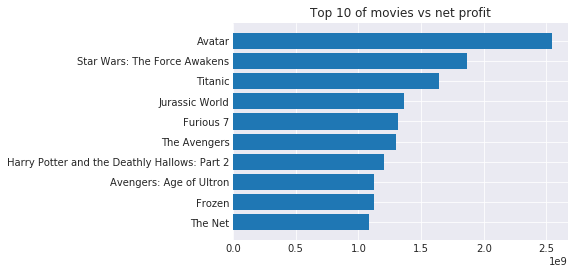

In [27]:
# the top 10 of movies vs net profit
df_movies_top10 = df_movies.sort_values('net_profit', ascending=False).head(N)
li = np.arange(1,len(df_movies_top10)+1)
plt.barh(li, df_movies_top10.net_profit, tick_label=df_movies_top10.original_title)
plt.gca().invert_yaxis()
plt.title('Top {} of movies vs net profit'.format(N))


<a id='exploring-factors'></a>


### Exploring Factors 
>exploring top 10s of `cast`, `director`, `genres` or `production_companies` in terms of the profits of movies and did not participate in any non profitable movies.

In [28]:
# specifying cast who participated in a non profitable movie
cast_always_profit = df_casts.query('net_profit > 0')
df_casts['cast_always_profit'] = np.repeat(False, len(df_casts))
df_casts.loc[df_casts.cast.isin(cast_always_profit.cast),'cast_always_profit'] = True

Text(0.5,1,'Top 10 of cast in terms of the the profits of movies')

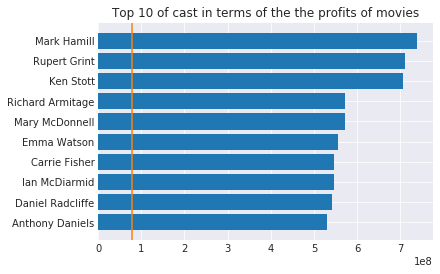

In [29]:
# The top cast in terms of the the profits of movies they participated and did not participate in any non profitable movie.
top10_casts = df_casts[df_casts['cast_always_profit'] == True].groupby('cast')['net_profit'].mean().sort_values(ascending=False).head(N)
df_casts['top10_cast'] = np.repeat(False, len(df_casts))
df_casts.loc[df_casts.cast.isin(top10_casts.index),'top10_cast'] = True
li = np.arange(1,len(top10_casts)+1)

plt.barh(li, top10_casts.values, tick_label=top10_casts.index)
plt.axvline(x=df_casts.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of cast in terms of the the profits of movies'.format(N))


In [30]:
# specifying director who participated in a non profitable movie
director_always_profit = df_directors.query('net_profit > 0')
df_directors['director_always_profit'] = np.repeat(False, len(df_directors))
df_directors.loc[df_directors.director.isin(director_always_profit.director),'director_always_profit'] = True

Text(0.5,1,'Top 10 of directors in terms of the the profits of movies')

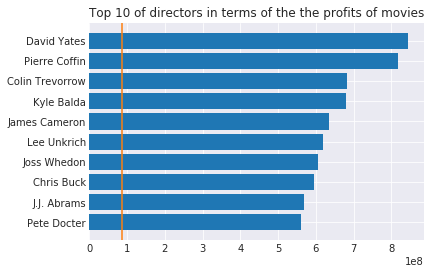

In [31]:
# The top directors in terms of the the profits of movies they participated and did not participate in any non profitable movie.
top10_directors = df_directors[df_directors['director_always_profit'] == True].groupby('director')['net_profit'].mean().sort_values(ascending=False).head(N)
df_directors['top10_directors'] = np.repeat(False, len(df_directors))
df_directors.loc[df_directors.director.isin(top10_directors.index),'top10_directors'] = True
li = np.arange(1,len(top10_directors)+1)

plt.barh(li, top10_directors.values, tick_label=top10_directors.index)
plt.axvline(x=df_directors.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of directors in terms of the the profits of movies'.format(N))

Text(0.5,1,'Top 10 of genres in terms of the the profits of movies')

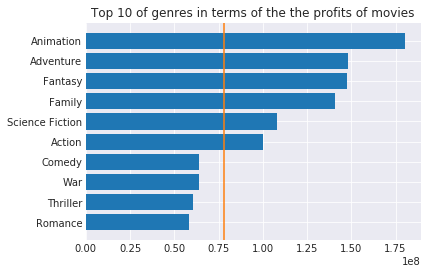

In [32]:
# The top genres in terms of the the profits of movies they participated and did not participate in any non profitable movie.
top10_genres = df_genres.groupby('genres')['net_profit'].mean().sort_values(ascending=False).head(N)
df_genres['top10_genres'] = np.repeat(False, len(df_genres))
df_genres.loc[df_genres.genres.isin(top10_genres.index),'top10_genres'] = True
li = np.arange(1,len(top10_genres)+1)

plt.barh(li, top10_genres.values, tick_label=top10_genres.index)
plt.axvline(x=df_genres.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of genres in terms of the the profits of movies'.format(N))

In [33]:
# specifying production_companies who participated in a non profitable movie
company_always_profit = df_companies.query('net_profit > 0')
df_companies['company_always_profit'] = np.repeat(False, len(df_companies))
df_companies.loc[df_companies.production_companies.isin(company_always_profit.production_companies),'company_always_profit'] = True

Text(0.5,1,'Top 10 of production companies in terms of the the profits of movies')

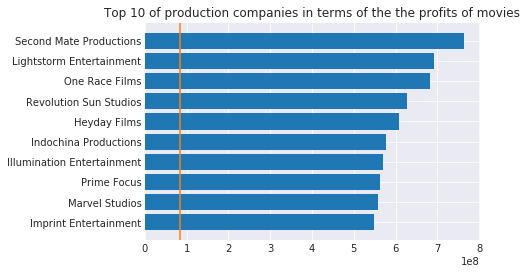

In [34]:
# The top production companies in terms of the the profits of movies they participated and did not participate in any non profitable movie.
top10_companies = df_companies[df_companies['company_always_profit'] == True].groupby('production_companies')['net_profit'].mean().sort_values(ascending=False).head(N)
df_companies['top10_directors'] = np.repeat(False, len(df_companies))
df_companies.loc[df_companies.production_companies.isin(top10_companies.index),'top10_companies'] = True
li = np.arange(1,len(top10_companies)+1)

plt.barh(li, top10_companies.values, tick_label=top10_companies.index)
plt.axvline(x=df_companies.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of production companies in terms of the the profits of movies'.format(N))

<a id='exploring-factors-top10-movies'></a>

### Exploring Factors (Top10 Movies)
>Exploring impact of the top 10 movies on the top 10s of `cast`, `director`, `genres` or `production companies`.

Text(0.5,1,'Top 10 of cast')

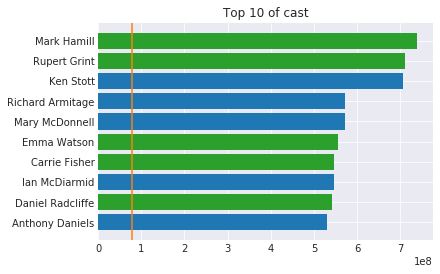

In [35]:
# 
df_casts['top10_movies'] = np.repeat(False, len(df_casts))
df_casts.loc[df_casts.id.isin(df_movies_top10.id),'top10_movies'] = True

data = df_casts.query('top10_cast == True').groupby('cast')['net_profit'].mean().sort_values(ascending=False)
data_ = df_casts.query('top10_cast == True and top10_movies == True')

color = np.where(data.index.isin(data_.cast), 'C2', 'C0')
li = np.arange(1,len(data)+1)
x = plt.barh(li, data.values, tick_label=data.index, color=color)
plt.axvline(x=df_casts.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of cast'.format(N))

Text(0.5,1,'Top 10 of directors')

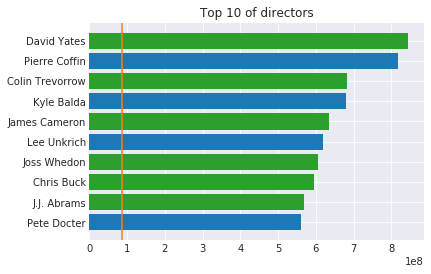

In [36]:
df_directors['top10_movies'] = np.repeat(False, len(df_directors))
df_directors.loc[df_directors.id.isin(df_movies_top10.id),'top10_movies'] = True

data = df_directors.query('top10_directors == True').groupby('director')['net_profit'].mean().sort_values(ascending=False)
data_ = df_directors.query('top10_directors == True and top10_movies == True')

color = np.where(data.index.isin(data_.director), 'C2', 'C0')
li = np.arange(1,len(data)+1)
x = plt.barh(li, data.values, tick_label=data.index, color=color)
plt.axvline(x=df_directors.net_profit.mean(), color='C1')
plt.gca().invert_yaxis()
plt.title('Top {} of directors'.format(N))


Text(0.5,1,'Top 10 of genres')

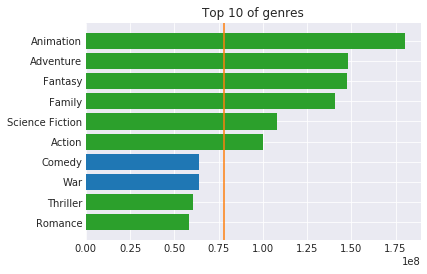

In [37]:
df_genres['top10_movies'] = np.repeat(False, len(df_genres))
df_genres.loc[df_genres.id.isin(df_movies_top10.id),'top10_movies'] = True

data = df_genres.query('top10_genres == True').groupby('genres')['net_profit'].mean().sort_values(ascending=False)
data_ = df_genres.query('top10_genres == True and top10_movies == True')
color = np.where(data.index.isin(data_.genres), 'C2', 'C0')
li = np.arange(1,len(data)+1)
x = plt.barh(li, data.values, tick_label=data.index, color=color)
plt.gca().invert_yaxis()
plt.axvline(x=df_genres.net_profit.mean(), color='C1')
plt.title('Top {} of genres'.format(N))

Text(0.5,1,'Top 10 of production companies')

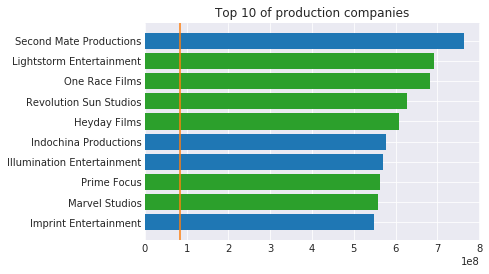

In [38]:
df_companies['top10_movies'] = np.repeat(False, len(df_companies))
df_companies.loc[df_companies.id.isin(df_movies_top10.id),'top10_movies'] = True

data = df_companies.query('top10_companies == True').groupby('production_companies')['net_profit'].mean().sort_values(ascending=False).head(N)
data_ = df_companies.query('top10_companies == True and top10_movies == True')
color = np.where(data.index.isin(data_.production_companies), 'C2', 'C0')
li = np.arange(1,len(data)+1)
x = plt.barh(li, data.values, tick_label=data.index, color=color)
plt.gca().invert_yaxis()
plt.axvline(x=df_companies.net_profit.mean(), color='C1')
plt.title('Top {} of production companies'.format(N))

<a id='conclusions'></a>
## Conclusions

If you consider to invest in movies and looking for profit. these are some advise:-

#### in Terms of Cast
The following casts did not participate in any non profitable movie and the average movies' profits, they have participated, is greater than the averege of all. Moreover, some of them have participated in the top 10 movies in terms of net profit.

Rank|Cast|Top 10 Movies
---|---|---
1. | Mark Hamill|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
2. | Rupert Grint|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
3. |Ken Stott|
4. |Richard Armitage|
5. |Mary McDonnell|
6. |Emma Watson|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
7. |Carrie Fisher|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
8. |Ian McDiarmid|
9. |Daniel Radcliffe|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
10. |Anthony Daniels|

#### in Terms of Directors
The following directors did not participate in any non profitable movie and the average movies' profits, they have participated, is greater than the averege of all. Moreover, some of them have participated in the top 10 movies in terms of net profit.

Rank|Director|Top 10 Movies
---|---|---
1. |David Yates|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
2. |Pierre Coffin|
3. |Colin Trevorrow|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
4. |Kyle Balda|
5. |James Cameron|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
6. |Lee Unkrich|
7. |Joss Whedon|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
8. |Chris Buck|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
9. |J.J. Abrams|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
10. |Pete Docter|

#### in Terms of Genres
The following Genres achieved movies' profits (in mean) greater than the average of all.

Rank|Genre|Top 10 Movie
---|---|---
1. |Animation|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
2. |Adventure|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
3. |Fantasy|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
4. |Family|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
5. |Science Fiction|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
6. |Action|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>

#### in Terms of Production Companies
The following production companies did not participate in any non profitable movie and the average movies' profits, they have participated, is greater than the averege of all. Moreover, some of them have participated in the top 10 movies in terms of net profit.

Rank|Production Company|Top 10 Movie
---|---|---
1. |Second Mate Productions|
2. |Lightstorm Entertainment|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
3. |One Race Films|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
4. |Revolution Sun Studios|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
5. |Heyday Films|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
6. |Indochina Productions|
7. |Illumination Entertainment|
8. |Prime Focus|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
9. |Marvel Studios|<img src="https://mastertrader.com/wp-content/uploads/2017/06/check-mark-icon.png" alt="Yes" style="width: 25px;"/>
10. |Imprint Entertainment|


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0